# Hopfield neural networks

**What is Hopfield Neural network?**

This is a network of interconnected nodes (neurons), each governed by dynamic equations of specific form. In the simplest formulation (discrete, and symmetric connectivity matrix), the neuron can be only in two states: +1 (up), and -1 (down). The neuron affects all the connected to it neighboring neurons by synapses: positive connections force the two connected neurons be in the same state, and negative connections tend to make neurons be in the opposite states.

<img src='../imgs_for_jupyter/HN.png' width="240" height="240" align="center"/>

**Equations for discrete Hopfiel Neural network of size $N$ (vector form)**:


$$h[n+1] =  Ws[n] + b $$

$$s[n+1] = sgn(h[n+1])$$


where
$\textbf{n}$ represents a number of a step during the evolution of the system

$\textbf{h}$ - is the column vector hidden state (could be regarded as a membrane potential of a neuron, or $\textbf{local field}$),

$\textbf{s}$ - is the column vector of states of neurons, (The variable ${ (\boldsymbol{s_{i}}+1)/2 }$ could be considered as firing rate of $i_{th}$ neuron)

$\textbf{W}$ - is the connectivity matrix $N \times N$, where the synaptic weights are stored, 

$\textbf{b}$ - is the bias (could be considered as a constant current injected into a neuron)


This network is very similar to dynamics of the atomic spins interacting with each other in solid states.
Thus one can define an energy function:

For two neurons, the energy of their interaction is : $$H_{i,j} = -w_{ij}s_i s_j$$

For the whole system of $N$ neurons:

$$ H = - s^{T} W s - (b,s)$$

This energy function has the local extrema - the fixed points of the dynamics. Once the network arrives at this states, it no longer escapes it (if there is no noise). If we set $b = 0$ The positions of these local minima are encoded in the weight matrix $W$. This makes the system ideal for storage of binary vectors (patterns). 

Once the system has learned (the weights has been adjusted accordingly) to store the patterns, one can initialise the system in one of these patterns corrupted with noise, and if the noise level is sufficiently small, the system will relax to the state corresponding to the closest pattern it has memorised.

# Hebbian learning

The simplest rule to learn these patterns by network is: 'The neurons which fire together - wire together' - famous **Hebb's rule**. Lets call the $\textbf{p}$ patterns to memorise by $\boldsymbol{\sigma^{\nu}}$, where $\nu \in \{1,.,p\}$. 

In the context of Hopfield Neural networks the rule will be represented as:
$$w_{i,j} = \frac{1}{N}\sum_{\nu}\boldsymbol{\sigma^{\nu}_{i}}\boldsymbol{\sigma^{\nu}_{j}}$$

or in vectorised form (if we set $Z = \{\boldsymbol{\sigma^1} ,\boldsymbol{\sigma^2} \dots \boldsymbol{\sigma^p}\}$ - a $N \times p$ matrix consisting of collumn vectors of patterns stacked together horizontally):

$$W = \frac{1}{N}ZZ^T$$

Let's call the $\boldsymbol{m^{\nu}} = \frac{1}{N}(\sigma^{\nu},s)$ - an overlap of the current state $s$ with the pattern $\sigma^{\nu}$. If we consider an overlaps between two patterns - $\sigma^{\nu}$ and $\sigma^{\mu}$ - we denote their overlap as $M^{\mu\nu}$, where $M$ is the matrix of overlaps of patterns (**Important note**: $M = \frac{1}{N}Z^T Z$)

Consider $s[n]$ to be equal one of the patterns, say $\sigma^{\nu}$. Then the state on the next time step is:

$$s[n+1] = sgn\Big(\frac{1}{N}ZZ^T s[n]\Big) = sgn\Big(\frac{1}{N}ZZ^T \sigma^{\nu}\Big) = sgn\Big(ZM[:,\nu]\Big) = sgn\Big(\sum_{\mu} M^{\mu\nu}\sigma^{\mu}\Big) = sgn\Big(\sigma^{\nu} + \sum_{\mu \neq \nu} M^{\mu\nu}\sigma^{\mu}\Big)$$

where $M[:,\nu]$ is a size $p$ column vector of overlaps of patterns in $Z$ with $\sigma^{\nu}$. If the overlaps of $\sigma^{\nu}$ and other $\sigma^{\mu}$ are sufficiently small (which is usually the case for random binary vectors and large $N$) then $s[n+1]$ is exactly equal to $\sigma^{\mu}$, which means that the state is a fixed point of the dynamics.

The asymptotic storage capacity of Hopfield Network with hebbian rule is $O\big(\frac{N}{2 \ln N}\big)$

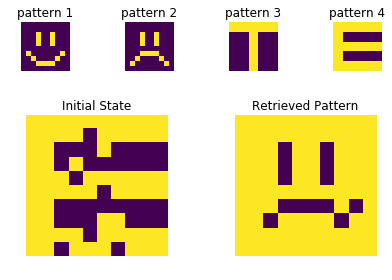

In [2]:
from visualisation import run_visualisation
learning_options = {'sc' : True, 'incremental' : True}
retrieval_options = {'time_of_retrieval' : 100, 'sync' : True}
options = {'rule' : 'Hebb', 'learning_options' : learning_options, 'retrieval_options' : retrieval_options}
run_visualisation(options=options, flips = 10, pattern_num = 4, random_patterns = False)

# Pseudoinverse rule 

But Hebbian rule is quite limited in terms of memory capcacity. A better option is **pseudoinverse** rule:

$$W = ZZ^+$$

where $^+$ denotes Moore-Penrouse inversion: $Z^+ = (Z^TZ)^{-1}Z^T$

Consider, once again, $s[n] = \sigma^{\nu}$. Then the state on the next time step is:

$$s[n+1] = sgn\Big(ZZ^+ s[n]\Big) = sgn\Big(Z(Z^TZ)^{-1}Z^T \sigma^{\nu}\Big) = sgn\Big(ZM^{-1}M[:,\nu]\Big) = sgn(\sigma^{\nu})$$

So, if there is no noise in the system, and the network is already in state which is represented by one of the patterns, it stays there. And it is much more stable than Hebbian rule!

The asymptotic storage capacity of Hopfield Network with pseudoinverse learning rule is $O(N)$. But, it is neither local, nor incremental, so it is not biologically plausible, as the network can't learn patterns one by one (non-incremental), and for the weight update, the synapse requires information which is not available at the spot (non-local) 

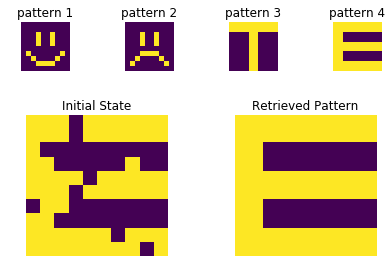

In [12]:
from visualisation import run_visualisation
learning_options = {'sc' : True}
retrieval_options = {'time_of_retrieval' : 100, 'sync' : True}
options = {'rule' : 'Pseudoinverse', 'learning_options' : learning_options, 'retrieval_options' : retrieval_options}
run_visualisation(options=options, flips = 10, pattern_num = 4, random_patterns = False)

# Storkey rule

There is yet another rule, which performs pretty well, and at the same time is biologically plausible (it's both incremental and local).

$$w_{ij} = \sum_{\mu}(\sigma^{\mu}_i - f_{ij})(\sigma^{\mu}_j - f_{ji})$$

where $f_{ij}$ is a local field on the neuron $i$ except the contribution of a neuron $j$: 

$$f_{ij} = \sum_{k}w_{ik}s_k - w_{ii}s_i - w_{ij}s_j $$

The asymptotic storage capacity of Hopfield Network with Storkey learning rule is $O\Big(\frac{n}{\sqrt[3]{4 \ln n}}\Big)$

According to Storkey's thesis, this rule is an approximation to a pseudoinverse rule.

Using Neumann series for inverse matrix ( $(I-T)^{-1} = \sum_i T^i$ ), one can approximate $(Z^TZ)^{-1}$ term in pseudoinverse rule (but, of course, there is more to it).

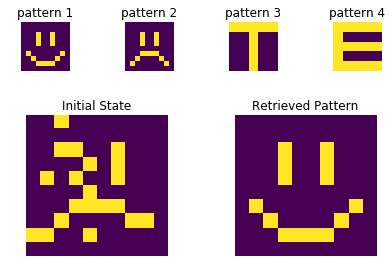

In [23]:
from visualisation import run_visualisation
learning_options = {'sc' : True, 'incremental' : True, 'order' : 2}
retrieval_options = {'time_of_retrieval' : 100, 'sync' : False}
options = {'rule' : 'Storkey', 'learning_options' : learning_options, 'retrieval_options' : retrieval_options}
run_visualisation(options=options, flips = 10, pattern_num = 2, random_patterns = False)

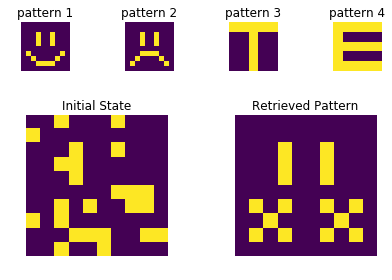

In [3]:
from visualisation import run_visualisation
learning_options = {'sc' : True, 'incremental' : True}
retrieval_options = {'time_of_retrieval' : 10, 'sync' : True}
options = {'rule' : 'StorkeyNormalisedLF', 'learning_options' : learning_options, 'retrieval_options' : retrieval_options}
run_visualisation(options=options, flips = 20, pattern_num = 1, random_patterns = False)

# Gradient descent and updates of weights

One can formulate the task of memorising a pattern as an optimisation task. Suppose we want to memorise a pattern $\boldsymbol{\sigma}$. Then, the optimisation task would be:

$$
\min_{W} d \big(\text{sign}(W\sigma + b), \sigma\big)
$$
with respect to similarity measure $d(x, y)$. For the sake of example, let's define it as a simple square norm: $d(x,y) = (x-y)^2$

The problem with this function is that the derivative of sign function is zero everywere apart from the origin. Which isn't great. But what if we substitute $sign(\cdot)$ by the some differentiable monotonically increasing function $f(\lambda\cdot)$?

the function to minimise would be: 
$$E = \Big(f\big(\lambda (W\sigma + b)\big) - \sigma\Big)^2$$
Taking a gradient of this function elementwise:

$$E = \sum_{k}z_k^2$$

where $z_k = \big(f(\lambda h_k) - \sigma_k\big)$, $h_k = \sum_{j} w_{kj}\sigma_j + b_i$

$$
\frac{d E}{d w_{ij}} = 2z_i\frac{d z_i}{d x}\Big|_{x = \lambda h_i} = 2\big(f(\lambda h_i) - \sigma_i\big)\frac{d f(x)}{d x}\Big|_{x = \lambda h_i}\lambda\sigma_j
$$

And thus, as the update of the weights and biases should be proportional to antigradient, to minimise the function:

$$
\Delta w_{ij} = - 2\lambda \big(f(\lambda h_i) - \sigma_i\big)\frac{d f(x)}{d x}\Big|_{x = \lambda h_i}\sigma_j
$$
$$
\Delta b_{i} = - 2\lambda \big(f(\lambda h_i) - \sigma_i\big)\frac{d f(x)}{d x}\Big|_{x = \lambda h_i}
$$

or in vector form:

$$
\Delta W = - 2\lambda \Big(\big(f(\lambda h) - \sigma\big) \odot \frac{d f(x)}{d x}\Big|_{x = \lambda h}\Big)\sigma^T
$$
$$
\Delta b = - 2\lambda \Big(\big(f(\lambda h) - \sigma\big) \odot \frac{d f(x)}{d x}\Big|_{x = \lambda h}\Big)
$$

# DescentL2 rule

Taking the function $f(x) = x$, we could write our update rule as follows:

$$
\Delta w_{ij} = 2\lambda \big(\sigma_i - \lambda h_i\big)\sigma_j
$$
$$
\Delta b_{i} = 2\lambda \big(\sigma_i - \lambda h_i\big)
$$

Vectorised form:
$$
\Delta W = 2\lambda \big(\sigma - \lambda h\big)\sigma^T
$$
$$
\Delta b = 2\lambda \big(\sigma - \lambda h\big)
$$


Experimenting with functions further, let's choose $f(x) = tanh(x)$:

$$
\Delta w_{ij} = - 2\lambda \big(tanh(\lambda h_i) - \sigma_i\big)\big(1 - tanh(\lambda h_i)^2\big)\sigma_j
$$
$$
\Delta b_i = - 2\lambda \big(tanh(\lambda h_i) - \sigma_i\big)\big(1 - tanh(\lambda h_i)^2\big)
$$


Vectorised form:
$$
\Delta W = - 2\lambda \Big(\big(tanh(\lambda h) - \sigma\big) \odot \big(1 - tanh(\lambda h)^2\big)\Big)\sigma^T
$$
$$
\Delta b = - 2\lambda \Big(\big(tanh(\lambda h) - \sigma\big) \odot \big(1 - tanh(\lambda h)^2\big)\Big)
$$


These two rules are somehow similar to the Storkey rule, but they are non symmetric and are more biologically plausible (as the receiving - postsinaptic - neuron requires only information available at this neuron, and the neuron doesn't have to subtract the contribution of presynaptic neuron from it's local field, as it is the case in Storkey rule). Moreover, now we know how to update biases! The intuition is simple: we have to update our biases as if they are the weighs of connections from a neuron from outside the network, which is always in +1 state

In [4]:
from visualisation import run_visualisation
learning_options = {'tol' : 1e-3, 'lmbd' : 0.5, 'activation_function' : 'linear'}
retrieval_options = {'time_of_retrieval' : 100, 'sync' : True}
options = {'rule' : 'DescentL2Solver', 'learning_options' : learning_options, 'retrieval_options' : retrieval_options}
run_visualisation(options=options, flips = 30, pattern_num = 1, random_patterns = False)

TypeError: descent_l2_with_solver() got an unexpected keyword argument 'activation_function'

# DescentOverlap rule
Let's now change the similarity measure between two vectors:
$$ d(x,y) = -(x,y)$$
so that if two vectors are aligned parallely they achieve minimum

We need to minimise function $E = -\big(f(\lambda W \sigma), \sigma\big)$

$E = -\sum_k z_k$, where $z_k = f(\lambda h_k) \sigma_k$, and, thus
$$
\frac{d E}{d w_{ij}} = -\frac{d z_i}{d x}\Big|_{x = \lambda h_i} = -\frac{d f(x)}{d x}\Big|_{x = \lambda h_i} \lambda \sigma_j \sigma_i
$$

And the update of weights to minimise the function would be:

$$
\Delta w_{ij} = \lambda \frac{d f(x)}{d x}\Big|_{x = \lambda h_i} \sigma_j \sigma_i
$$

$$
\Delta W = \lambda \big(\frac{d f(x)}{d x}\Big|_{x = \lambda h} \odot \sigma\big) \sigma^T
$$

if $f(x) = x$, then
$$
\Delta w_{ij} = \lambda \sigma_i \sigma_j
$$

$$
\Delta W = \lambda \sigma \sigma^T
$$ 
Which is exactly what Hebbian learning does!

if $f(x) = tanh(x)$, then

$$
\Delta w_{ij} = \lambda \big(1 - tanh(\lambda h_i)^2\big) \sigma_i \sigma_j
$$

$$
\Delta W = \lambda \Big((1 - tanh(\lambda h)^2) \odot \sigma \Big)\sigma^T
$$ 

In [5]:
from visualisation import run_visualisation
learning_options = {'tol' : 1e-3, 'lmbd' : 0.5, 'activation_function' : 'linear'}
retrieval_options = {'time_of_retrieval' : 100, 'sync' : True}
options = {'rule' : 'DescentOverlapSolver', 'learning_options' : learning_options, 'retrieval_options' : retrieval_options}
run_visualisation(options=options, flips = 10, pattern_num = 2, random_patterns = False)

ValueError: the specified learning rule is not implemented

# DescentCrossentropy

let's now define a similarity measure as: 
$d(x,y) = \sum_i -\frac{y_i+1}{2}log(\frac{x_i+1}{2}) - \frac{1-y_i}{2}log(\frac{1-x_i}{2})$, so

$$
E = -\sum_i \frac{\sigma_i+1}{2}log\Big(\frac{f(\lambda h_i)+1}{2}\Big) + \frac{1-\sigma_i}{2}log\Big(\frac{1-f(\lambda h_i)}{2}\Big)
$$

Then minimising the gradient of the function $E$ with respect to $w_{ij}$ becomes:


$$
\frac{d E}{d w_{ij}} = -\frac{\sigma_i+1}{2} \Big(\frac{2}{f(\lambda h_i)+1}\Big)\frac{1}{2} \lambda \frac{d f(x)}{d x}\Big|_{x = \lambda h_i}\sigma_j - \frac{1-\sigma_i}{2} \Big(\frac{2}{1-f(\lambda h_i)}\Big)\frac{1}{2} \lambda \frac{d f(x)}{d x}\Big|_{x = \lambda h_i}\sigma_j =  \frac{\lambda}{2} \frac{d f(x)}{d x}\Big|_{x = \lambda h_i}\sigma_j \Big( (\sigma_i+1)\Big(\frac{1}{1+f(\lambda h_i)}\Big)+ (1-\sigma_i)\Big(\frac{1}{1-f(\lambda h_i)}\Big)\Big) = \frac{\lambda}{2} \frac{d f(x)}{d x} \Big|_{x = \lambda h_i}\sigma_j\frac{((\sigma_i+1)(1-f(\lambda h_i)) + (1-\sigma_i)(1+f(\lambda h_i))}{(1-f^2(\lambda h_i))} = \frac{\lambda}{2(1-f^2(\lambda h_i))} \frac{d f(x)}{d x}\Big|_{x = \lambda h_i} \sigma_j \big(\sigma_i+1 - f(\lambda h_i)\sigma_i-f(\lambda h_i) + 1-\sigma_i - f(\lambda h_i)\sigma_i + f(\lambda h_i)\big) = \frac{\lambda}{2(1-f^2(\lambda h_i))} \frac{d f(x)}{d x}\Big|_{x = \lambda h_i} \sigma_j \big(2 -  2f(\lambda h_i)\sigma_i\big) = \frac{\lambda (1 -  f(\lambda h_i)\sigma_i) }{(1-f^2(\lambda h_i))} \sigma_j \frac{d f(x)}{d x}\Big|_{x = \lambda h_i}
$$

in short:
$$
\frac{d E}{d w_{ij}}  = \lambda \frac{ (1 -  f(\lambda h_i)\sigma_i) }{(1-f^2(\lambda h_i))} \sigma_j \frac{d f(x)}{d x}\Big|_{x = \lambda h_i}
$$

if we consider $f(x) = x$:

$$\Delta w_{ij} = -\lambda \frac{ (1 -  \lambda h_i\sigma_i) }{(1-(\lambda h_i)^2)} \sigma_j$$

and if $f(x) = tanh(x)$:

$$\Delta w_{ij} = -\lambda (1 -  tanh(\lambda h_i)\sigma_i) \sigma_j$$


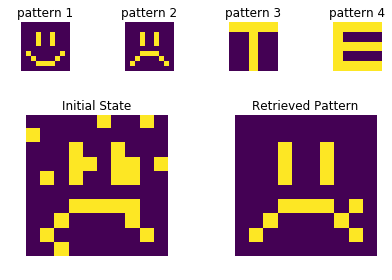

In [2]:
from visualisation import run_visualisation
learning_options = {'sc' : True, 'incremental' : True}
retrieval_options = {'time_of_retrieval' : 100, 'sync' : True}
options = {'rule' : 'StorkeyNormalisedLF', 'learning_options' : learning_options, 'retrieval_options' : retrieval_options}
run_visualisation(options=options, flips = 10, pattern_num = 2, random_patterns = False)

# Comparison of the performance of various rules

<img src='../imgs_for_jupyter/flips_and_patterns_Hebb_sc_100.png' width="1000" height="1000" align="center"/>
<img src='../imgs_for_jupyter/flips_and_patterns_pseudoinverse_sc_100.png' width="1000" height="1000" align="center"/>
<img src='../imgs_for_jupyter/flips_and_patterns_StorkeyAsymm_sc_100.png' width="1000" height="1000" align="center"/>
<img src='../imgs_for_jupyter/flips_and_patterns_Storkey_sc_100.png' width="1000" height="1000" align="center"/>

Further topics to explore:
- Boltzmann Machines
- Continuous Hopfield Network
- Storing Cycles
- Nonlinear Hebbian learning

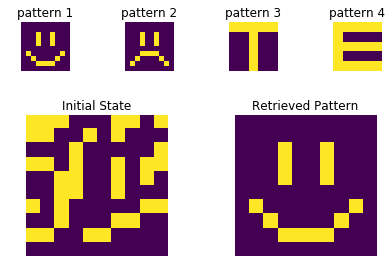

In [7]:
from visualisation import run_visualisation
learning_options = {'gamma' : 0.01}
retrieval_options = {'time_of_retrieval' : 10, 'sync' : True}
options = {'rule' : 'ChebyshevCentre', 'learning_options' : learning_options, 'retrieval_options' : retrieval_options}
run_visualisation(options=options, flips = 30, pattern_num = 1, random_patterns = False)

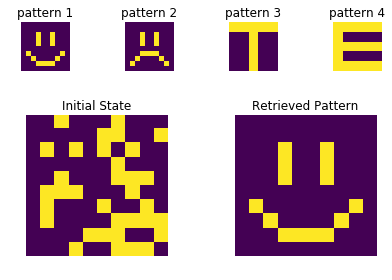

In [8]:
from visualisation import run_visualisation
learning_options = {'sc' : True}
retrieval_options = {'time_of_retrieval' : 100, 'sync' : False}
options = {'rule' : 'L2DifferenceMin', 'learning_options' : learning_options, 'retrieval_options' : retrieval_options}
run_visualisation(options=options, flips = 30, pattern_num = 1, random_patterns = False)